# 度数分布表とヒストグラム

##概要

**目的**

度数分布表とヒストグラムを作成する


**今回使うライブラリ**
*   Pandas： データの集計や可視化を統合的に行うライブラリ





**Pandas**

Pandasライブラリを使うと，さまざまなデータの操作をスムーズに柔軟に実施することができます．

Pandasでは，データの塊を「シリーズ(Series)オブジェクト」や「データフレーム (DataFrame) オブジェクト」といった型で扱います．また，このようなオブジェクト効率的に高速に扱うための機能が用意されています．

*   Seriesオブジェクトは時系列データのよう1次元のデータを主に扱います
*   Dataframeオブジェクトは表のように2次元になっているデータを収納するものです

公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/

##ライブラリの読み込み

Pythonは標準の状態ではあまりいろいろな事はできませんが，さまざまなライブラリをインポート（導入）することで，いろいろな関数が使えるようになったり，データ処理に適した変数の型を使えるようになったりして，超パワーアップします．ここでは，データ分析でよく使われるPythonのライブラリであるNumpy，Matplotlib，Pandasを使ってみましょう．

**基本的なライブラリの読み込みパターン**

**import xxx**

xxx library をすべて読み込み，xxx.関数名 といった形で利用する．

**import xxx.a_func as b_func**

xxx library の a_func だけを b_func という別名をつけて読み込む．名前の衝突の防止や短縮型として利用する．

**from xxx import a_func**

xxx library の a_func だけ読み込み，a_func で利用する．from をつけると xxx は指定せず利用できる．

In [ ]:
#pandasライブラリを pd という略称をつけて読み込む
import pandas as pd

##新商品の評価データの分析

In [ ]:
#既存商品の評価
old_ramen_data =pd.Series( ["かなり不味い","どちらでもない","やや美味しい","どちらでもない"
                            ,"かなり不味い","どちらでもない","かなり不味い","かなり美味しい","やや不味い"
                            ,"かなり不味い","かなり美味しい","どちらでもない","かなり不味い","かなり不味い"
                            ,"どちらでもない","どちらでもない","どちらでもない","かなり不味い","やや不味い"
                            ,"かなり美味しい","やや不味い","かなり不味い","かなり不味い","かなり不味い"
                            ,"やや不味い","どちらでもない","どちらでもない","やや美味しい","やや不味い"
                            ,"かなり不味い","かなり不味い","やや不味い","やや不味い","かなり不味い"
                            ,"どちらでもない","かなり不味い","かなり不味い","かなり不味い","かなり不味い"
                            ,"かなり美味しい","かなり不味い","かなり不味い","かなり美味しい","やや不味い"
                            ,"やや美味しい","かなり不味い","かなり不味い","やや不味い","やや美味しい"
                            ,"やや不味い"])
new_ramen_data = pd.Series( ["かなり美味しい","やや美味しい","やや美味しい","やや美味しい"
                             ,"どちらでもない","やや不味い","どちらでもない","どちらでもない","やや不味い"
                             ,"やや美味しい","どちらでもない","やや不味い","かなり美味しい","やや美味しい"
                             ,"かなり美味しい","かなり不味い","やや美味しい","どちらでもない","やや不味い"
                             ,"やや不味い","かなり美味しい","どちらでもない","やや美味しい","かなり不味い"
                             ,"かなり不味い","かなり不味い","やや不味い","やや美味しい","どちらでもない"
                             ,"かなり美味しい","かなり美味しい","やや美味しい","かなり不味い","かなり不味い"
                             ,"やや美味しい","やや不味い","かなり美味しい","やや不味い","やや美味しい"
                             ,"かなり美味しい","どちらでもない","どちらでもない","やや不味い","どちらでもない"
                             ,"やや不味い","かなり美味しい","かなり美味しい","かなり不味い","どちらでもない"
                             ,"どちらでもない"])

#データフレーム (DataFrame) オブジェクトに変換
df_old = pd.DataFrame({ 'evaluation' : old_ramen_data ,'products'   : 'old'})
df_new = pd.DataFrame({ 'evaluation' : new_ramen_data ,'products'   : 'new'})

#2つのデータフレームを統合する
df = pd.concat([df_old, df_new])

#このpandasクラスのdfオブジェクトの様々なpandasのメソッドを使ってこのあとの処理を行っていきます
#評価語を数値で置換
df =df.replace({'かなり美味しい':1,'やや美味しい':2,'どちらでもない':3,'やや不味い':4, 'かなり不味い':5})

#最初の方だけ表示してみる
df.head()

,evaluation,products
0,5,old
1,3,old
2,2,old
3,3,old
4,5,old


In [ ]:
#dfを'products'でグルーピングして，そのグルーピングしたものの'evaluation'だけを抜き出して，
#その出現回数をカウントして，最後にindex(ここでは評価値）で並べ直す
 ｄｆ.groupby('products')['evaluation'].value_counts().sort_index()

products  evaluation
new       1             10
          2             11
          3             12
          4             10
          5              7
old       1              5
          2              4
          3             10
          4             10
          5             21
Name: evaluation, dtype: int64

products
new    AxesSubplot(0.125,0.125;0.775x0.755)
old    AxesSubplot(0.125,0.125;0.775x0.755)
Name: evaluation, dtype: object

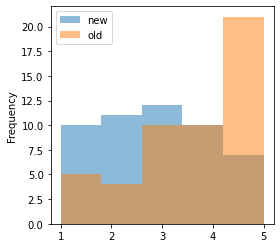

In [ ]:
#dfを'products'でグルーピングして，そのグルーピングしたものの'evaluation'だけを抜き出して，
#そのヒストグラムを重ねる（legend = Trueは「凡例を有効にする」という意味）
df.groupby('products')['evaluation'].plot( bins=5, alpha=0.5, figsize=(4,4), kind='hist', legend=True)

##通学時間の度数分布

In [ ]:
#データ読込（仮想データ）
commuting_time = pd.Series([46,109,30,117,51,32,29,19,20,36,61,86,
                           17,15,58,78,69,54,60,59,48,21,34,22,36,95,25,107,
                           115,51,91,123,94,47,84,59,66,35,21,64,47,21,66,59,
                           47,38,41,23,70,44,104,14,33,70,68,26,98,99,15,46,
                           85,14,79,42,91,57,55,117,43,60,28,17,68,18,89,54,
                           38,89,31,27,39,113,18,60,51,63,41,44,37,107,77,94,
                           16,104,47,100,19,95,20,13
        ])

In [ ]:
#基本統計量の確認
commuting_time.describe()

count    100.000000
mean      55.730000
std       30.411938
min       13.000000
25%       30.750000
50%       51.000000
75%       78.250000
max      123.000000
dtype: float64

In [ ]:
#間隔を１０にする
interval = 10
# 分割の粒度（range関数でrange（開始，終了，間隔）と指定すると，等差数列ができる）
bins = range(0,max(commuting_time)+interval , interval ) 

#pd.cutは区間に振り分ける処理を行う
commuting_time_cut = pd.cut(commuting_time, bins =bins)

#集計する．
#0から10までは0人であることがわかる．”（”は開区間，”]”は閉区間を意味する
pd.value_counts(commuting_time_cut, sort=False)

(0, 10]        0
(10, 20]      14
(20, 30]      11
(30, 40]      11
(40, 50]      13
(50, 60]      14
(60, 70]      10
(70, 80]       3
(80, 90]       5
(90, 100]      9
(100, 110]     5
(110, 120]     4
(120, 130]     1
dtype: int64

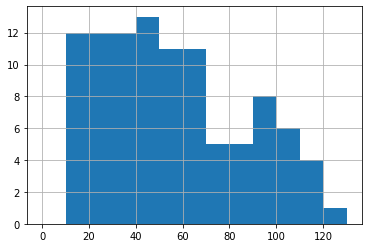

In [ ]:
commuting_time.hist(bins=bins)


##Irisデータセットを使ってみる

Iris(アヤメ) flower data set は，著名な統計学者であり生物学者でもあるRonald Fisherが氏提供した多変量データのセットです．
Iris (アヤメ属) に属する 3 品種、setosa (セトサ)、versicolor (バージカラー)、versinica (バージニカ) の特徴量測定値とクラス
データ（品種データ）が収められています．Irisデータセットは非常に有名なデータセットで，統計・機械学習の分野では
ゴールドスタンダード（画像処理で言うところにLena画像と同じような位置づけ）として用いられています．
https://en.wikipedia.org/wiki/Iris_flower_data_set.

![comment](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)



機械学習用ライブラリ scikit-learn には練習用データセットとしてIris flower data setが提供されています．
これを使ってみましょう．

In [ ]:
import pandas as pd

#scikit-learnライブラリからデータセットだけを用いる
from sklearn import datasets

In [ ]:
#Irisデータを読み込みます
iris = datasets.load_iris()

iris.data にはsepal length (がくの長さ)、sepal width (がくの幅)、petal length (花弁の長さ)、petal width (花弁の幅) の測定値が収められています．
iris.target はクラスデータ (品種データ) です．これらを統合して一つのDataFrameを作成します．

In [ ]:
#Iris.dataには花の特徴量がある．iris.targetに'target'と名前をつけて一つのDataFrameに統合
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]

#最初の５行だけ表示してみる
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


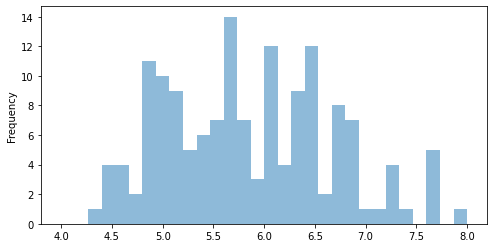

In [ ]:
df['sepal length (cm)'].plot( bins=30, range=(4, 8),  alpha=0.5, figsize=(8,4), kind='hist')

target
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal length (cm), dtype: object

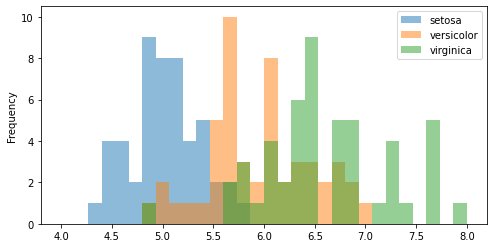

In [ ]:
#dfを'target'（品種）でグルーピングして，そのグルーピングしたものの'sepal length (cm)'だけを抜き出して，
#そのヒストグラムを重ねる
df.groupby('target')['sepal length (cm)'].plot(bins=30, range=(4, 8), alpha=0.5, figsize=(8,4), kind='hist',  legend=True)


target
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal length (cm), dtype: object

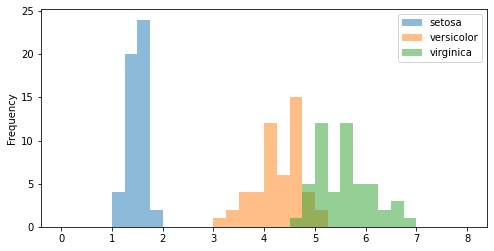

In [ ]:
#dfを'target'（品種）でグルーピングして，そのグルーピングしたものの'petal length (cm)'だけを抜き出して，
#そのヒストグラムを重ねる
df.groupby('target')['petal length (cm)'].plot(bins=32, range=(0, 8), alpha=0.5, figsize=(8,4), kind='hist',  legend=True)

In [ ]:
df.groupby('target')['petal length (cm)'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


##ヒストグラムの適切な幅

*   最大値と最小値を求める。
*   最大値と最小値の差 𝑅（範囲）を求める
*   区間の個数 𝑘 (グラフの棒の本数）を決める。
    *        簡単に、𝑘=10 や 20 などきりの良い数にする
    *       $k=\sqrt{n}$　　ただし𝑛はサンプルサイズ（データの個数）
    *       $k=1+\log_2 (𝑛)$ [スタージェスの式]

 区間幅  ℎ を求める。
 ℎ=𝑅÷𝑘 
 ℎ の値を見て、きりのいい数字に設定する
          

In [ ]:
import numpy as np

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)
#randnは標準正規分布（平均=0, 分散=1）に従う乱数を所定の個数発生させる関数
x = pd.Series(np.random.randn(100))

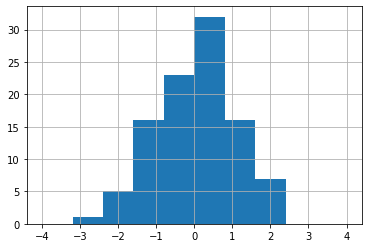

In [ ]:
#(-5,5)の区間を10分割した区間でヒストグラムを書く
x.hist(bins=10,range=(-4,4))


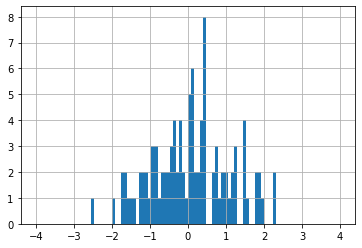

In [ ]:
#(-5,5)の区間を100分割した区間でヒストグラムを書く
x.hist(bins=100,range=(-4,4))


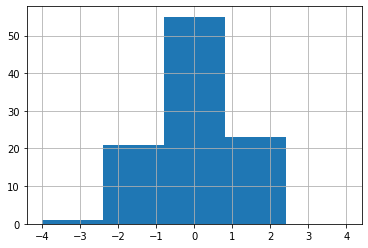

In [ ]:
#(-5,5)の区間を5分割した区間でヒストグラムを書く
x.hist(bins=5,range=(-4,4))


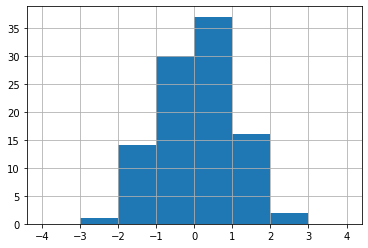

In [ ]:
#スタージェスの式で求めると
from math import log
k = 1+ log(len(x), 2)

from math import ceil
#階級数は整数である必要があるので切り上げ関数ceilを用いる
edges = ceil(k)

#(-5,5)の区間を5分割した区間でヒストグラムを書く
x.hist(bins=edges,range=(-4,4))